# Attributes Information
There are 4 features including class label/dependent variable.
- 30 - It represents age of patient at the time of operation(numerical)
- 64 - It represents year of operation(numerical)
- 1 - It tells no of +ve auxillry node detected(numerical)
- 1.1 - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

### Objective
To classify/predict a patient survival who had undergone surgery for breast cancer.

In [42]:
import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

In [43]:
# To load data in dataframe
df = pd.read_csv("haberman.csv")

In [44]:
# Renaming columns
df = df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node", "1.1" : "survival_status"})

In [45]:
df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [46]:
# To know about data summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


Observations:

- no missing values
- survival_status is our target column

In [47]:
print(df.describe())

              age  operation_year  axillary_lymph_node  survival_status
count  305.000000      305.000000           305.000000       305.000000
mean    52.531148       62.849180             4.036066         1.265574
std     10.744024        3.254078             7.199370         0.442364
min     30.000000       58.000000             0.000000         1.000000
25%     44.000000       60.000000             0.000000         1.000000
50%     52.000000       63.000000             1.000000         1.000000
75%     61.000000       66.000000             4.000000         2.000000
max     83.000000       69.000000            52.000000         2.000000


In [48]:
df.survival_status.value_counts()

1    224
2     81
Name: survival_status, dtype: int64

- 73% of values are 'yes' hence imbalanced
- mean and meadian age is 53 where age varies from 30 to 83

## EDA

C:\Users\Anubhav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


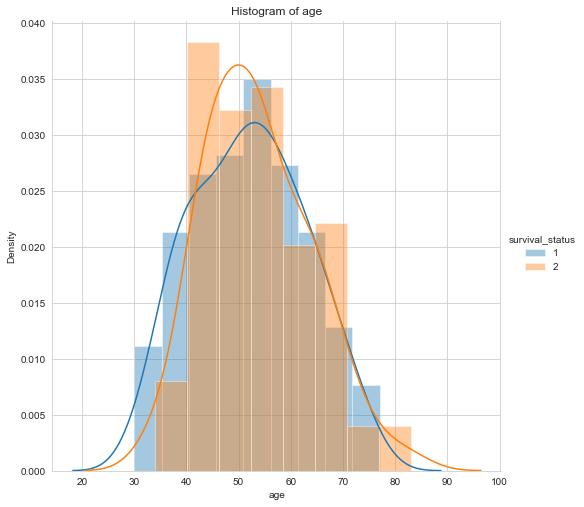

In [49]:
#PDF(Probality Density Function)

im=sns.FacetGrid(df, hue = "survival_status", size = 7)
im.map(sns.distplot, "age")
im.add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

C:\Users\Anubhav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


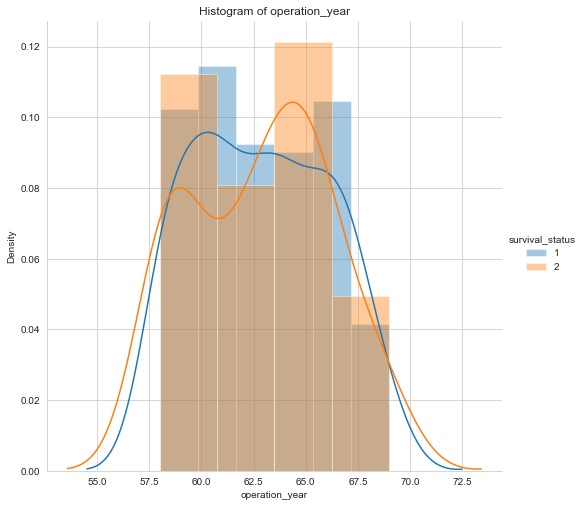

In [50]:
im=sns.FacetGrid(df, hue = "survival_status", size = 7)
im.map(sns.distplot, "operation_year")
im.add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

C:\Users\Anubhav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


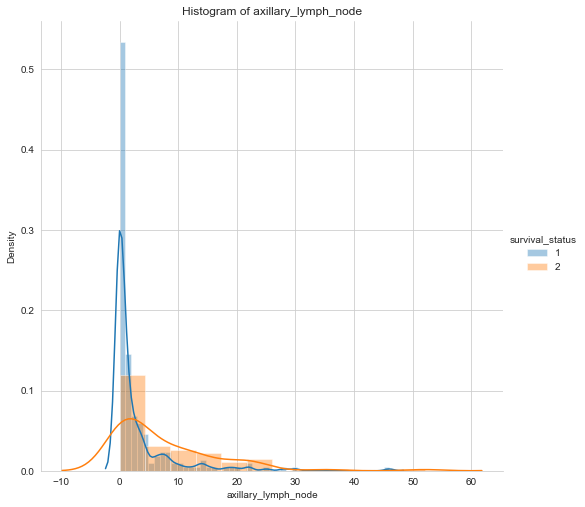

In [51]:
im=sns.FacetGrid(df, hue = "survival_status", size = 7)
im.map(sns.distplot, "axillary_lymph_node")
im.add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

Observations

- survival is high for people with 0-5 axillary_lymph_node

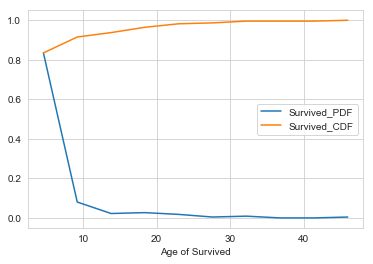

In [52]:
#CDF (Commulative Distribution Function)

df_a = df.loc[df["survival_status"]==1]
counts, bin_edges = np.histogram(df_a['axillary_lymph_node'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of Survived")
plt.show()

Observation

- 100% of the 1 had less than 40 axillary nodes dect and 4% have less than 10 auxillary nodes dect.

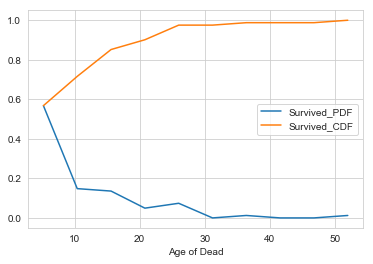

In [53]:
df_d = df.loc[df["survival_status"]==2]
counts, bin_edges = np.histogram(df_d['axillary_lymph_node'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of Dead")
plt.show()

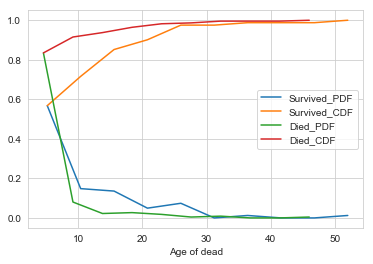

In [54]:
counts, bin_edges = np.histogram(df_d['axillary_lymph_node'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_a['axillary_lymph_node'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
plt.xlabel("Age of dead")
plt.show()

Observation

- axillary nodes is the most important feature to predict the survival status after 5 years.
- The survival rate is extremely high for patients having less than 3 axillary nodes dect.

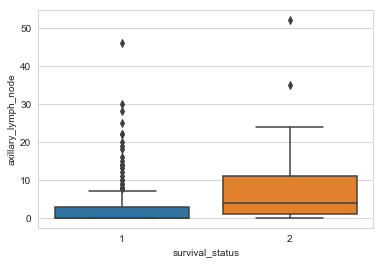

In [55]:
# Boxplot and Whiskers
sns.boxplot(x='survival_status', y='axillary_lymph_node', data=df)
plt.show()

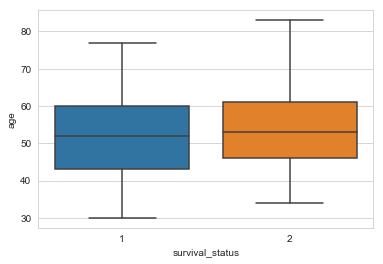

In [56]:
sns.boxplot(x='survival_status', y='age', data=df)
plt.show()

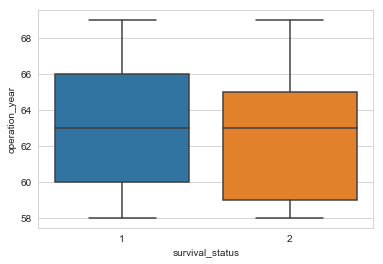

In [57]:
sns.boxplot(x='survival_status', y='operation_year', data=df)
plt.show()

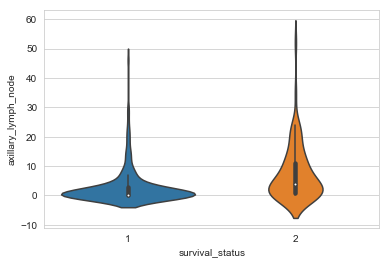

In [58]:
# Violin plot

sns.violinplot(x='survival_status', y='axillary_lymph_node', data=df, size=5)
plt.show()

Observation

- 50th percentile of survivors have 0 positive nodes, 75th percentie of survivors have less than 3 positive axilary nodes
- 25th percentile of dead have 1 positive axilary node, 50th percentile of dead have positive axilary nodes below 4,
- 75th percentile of dead have positive nodes below 11
- the people between the age from 30 to approx. 34 survived after the treatment.
- people past the age of 73 were not able to survive.

C:\Users\Anubhav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


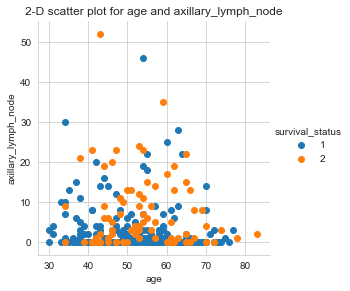

In [59]:
# Scatter Plot
# 2d scatter plot 

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 4).map(plt.scatter, "age", "axillary_lymph_node").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()

Observation

- 0-5 axillary_lymph_node person survived and died as well but the died ratio is less than survive ratio.

C:\Users\Anubhav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


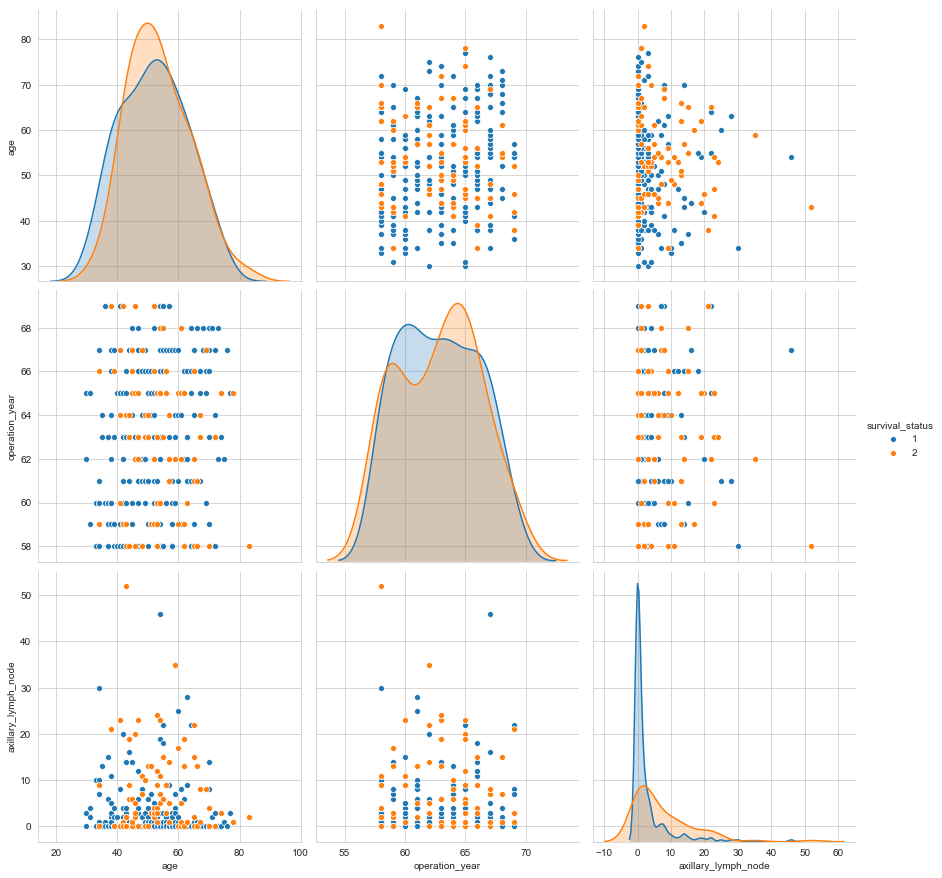

In [60]:
#pair plot

sns.pairplot(df, hue='survival_status', vars = ["age", "operation_year", "axillary_lymph_node"],size=4)
plt.show()

## Conclusion

- The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points 
- if number of axillary node is less,than survival of patients is more
- the dataset size is too small to bring out strong conclusion